In [1]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
paris = pd.read_csv('paris_onemonth.csv')

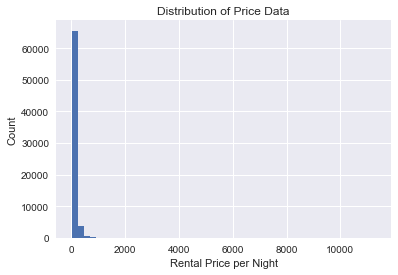

In [3]:
# examine price data

plt.hist(paris.price, bins = 50)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

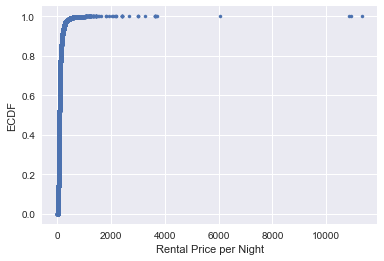

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x,y


x, y = ecdf(paris.price)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Rental Price per Night')
plt.ylabel('ECDF')
plt.show()


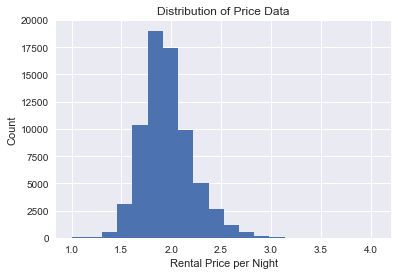

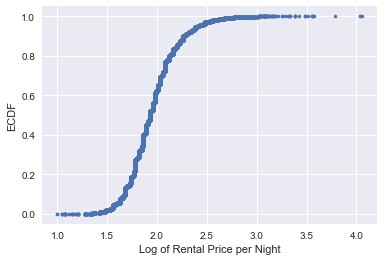

In [5]:
x_log, y_log = ecdf(paris.log_price)

plt.hist(paris.log_price, bins = 20)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

plt.plot(x_log, y_log, marker='.', linestyle='none')
plt.xlabel('Log of Rental Price per Night')
plt.ylabel('ECDF')
plt.show()

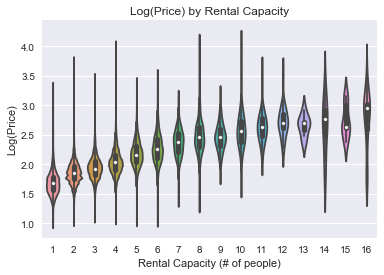

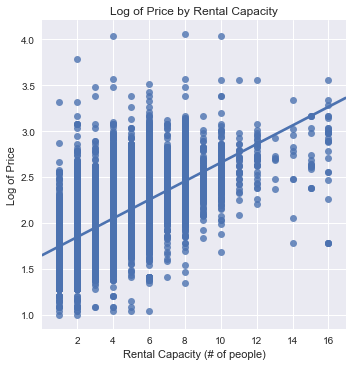

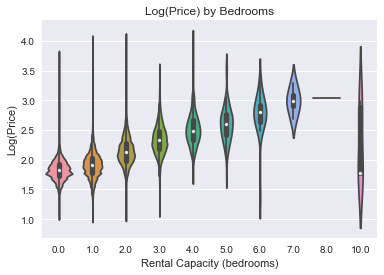

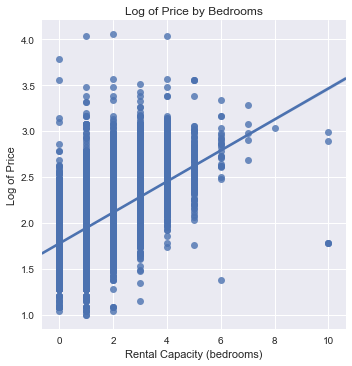

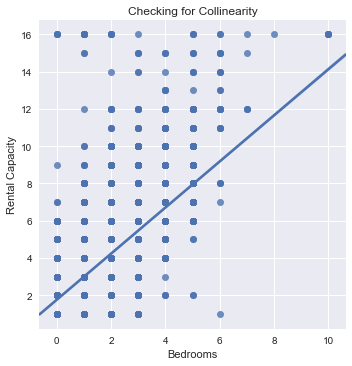

In [6]:
# examine rental capacity 
sns.violinplot(paris.accommodates, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity')
plt.show()

sns.lmplot(x='accommodates', y='log_price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Log of Price')
plt.title('Log of Price by Rental Capacity')
sns.plt.show()


sns.violinplot(paris.bedrooms, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Bedrooms')
plt.show()

sns.lmplot(x='bedrooms', y='log_price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (bedrooms)')
plt.ylabel('Log of Price')
plt.title('Log of Price by Bedrooms')
sns.plt.show()

sns.lmplot(x='bedrooms', y='accommodates', data=paris, fit_reg=True, legend=True)
plt.xlabel('Bedrooms')
plt.ylabel('Rental Capacity')
plt.title('Checking for Collinearity')
sns.plt.show()

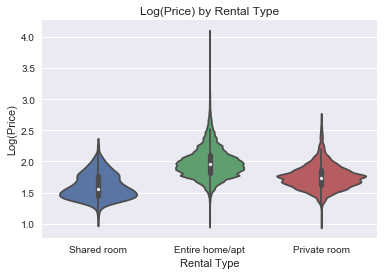

In [7]:
# room type

sns.violinplot(paris.room_type, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Type')
plt.title('Log(Price) by Rental Type')
plt.show()

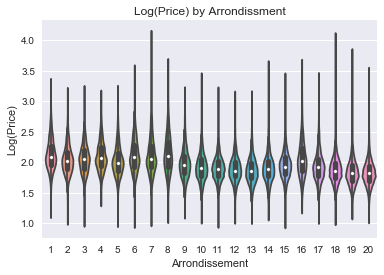

In [8]:
# examine arrondissements

sns.violinplot(paris.arrondissement, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Arrondissement')
plt.title('Log(Price) by Arrondissment')
plt.show()

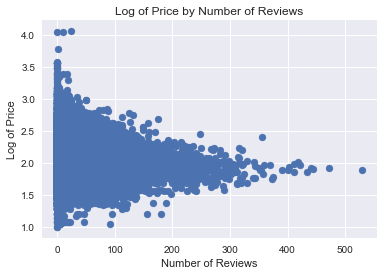

In [9]:
# examine reviews 
plt.scatter(paris.reviews, paris.log_price)
plt.xlabel('Number of Reviews')
plt.ylabel('Log of Price')
plt.title('Log of Price by Number of Reviews')
plt.show()

In [10]:
# split data into listings with reviews and those without 

paris_rev = paris[paris['reviews'] > 0]
paris_notrev = paris[paris['reviews'] == 0]

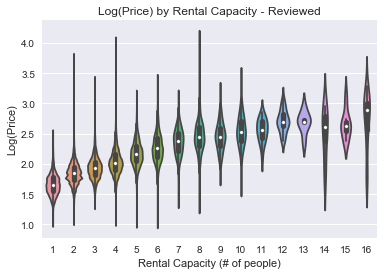

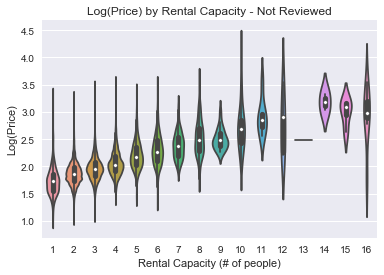

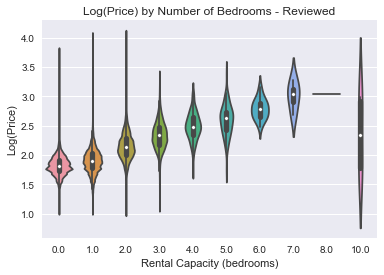

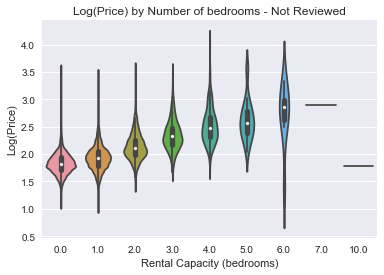

In [11]:
# examine rental capacity 
sns.violinplot(paris_rev.accommodates, paris_rev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Reviewed')
plt.show()

# examine rental capacity 
sns.violinplot(paris_notrev.accommodates, paris_notrev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Not Reviewed')
plt.show()


# bedrooms 
sns.violinplot(paris_rev.bedrooms, paris_rev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Number of Bedrooms - Reviewed')
plt.show()

sns.violinplot(paris_notrev.bedrooms, paris_notrev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Number of bedrooms - Not Reviewed')
plt.show()

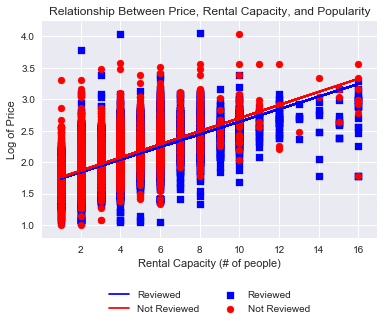

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_rev.accommodates, paris_rev.log_price, c='b', marker="s", label='Reviewed')
m, b = np.polyfit(paris_rev.accommodates, paris_rev.log_price, 1)
ax1.plot(paris_rev.accommodates, m*paris_rev.accommodates + b, '-', c = 'b', label = 'Reviewed')
ax1.scatter(paris_notrev.accommodates, paris_notrev.log_price, c='r', marker="o", label='Not Reviewed')
l, p = np.polyfit(paris_notrev.accommodates, paris_notrev.log_price, 1)
ax1.plot(paris_notrev.accommodates, l*paris_notrev.accommodates + p, '-', c = 'r', label = 'Not Reviewed')
plt.title('Relationship Between Price, Rental Capacity, and Popularity')
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Log of Price')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

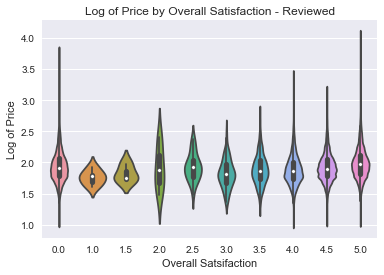

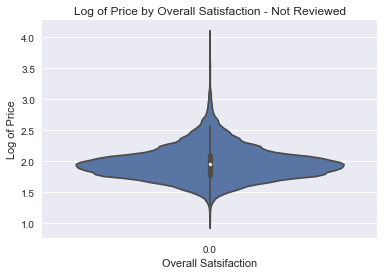

In [13]:
sns.violinplot(paris_rev.overall_satisfaction, paris_rev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Reviewed')
plt.show()

sns.violinplot(paris_notrev.overall_satisfaction, paris_notrev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Not Reviewed')
plt.show()

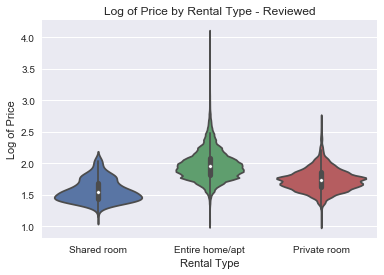

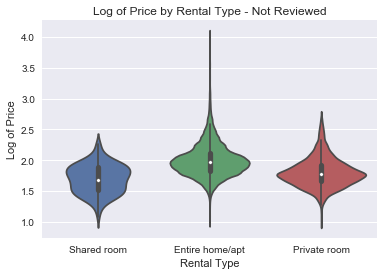

In [14]:
sns.violinplot(paris_rev.room_type, paris_rev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Reviewed')
plt.show()

sns.violinplot(paris_notrev.room_type, paris_notrev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Not Reviewed')
plt.show()

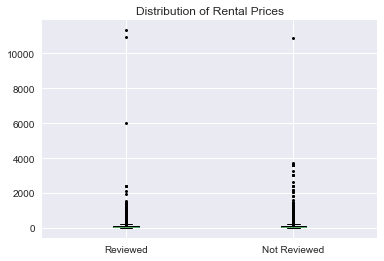

In [15]:
plt.boxplot([paris_rev.price, paris_notrev.price], sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

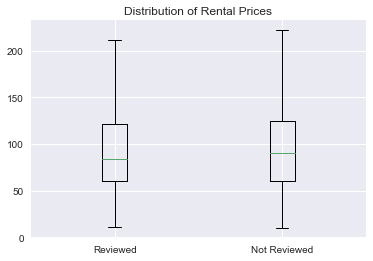

In [16]:
plt.boxplot([paris_rev.price, paris_notrev.price], showfliers=False, sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

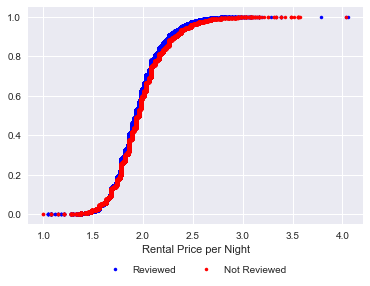

In [17]:
x_rev, y_rev = ecdf(paris_rev.log_price)
x_nr, y_nr = ecdf(paris_notrev.log_price)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x_rev, y_rev, marker='.', linestyle='none', c='b', label='Reviewed')
ax1.plot(x_nr, y_nr, marker='.', linestyle='none', c = 'r', label = 'Not Reviewed')
plt.xlabel('Rental Price per Night')
#plt.ylabel('ECDF')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

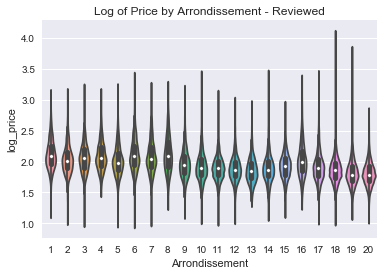

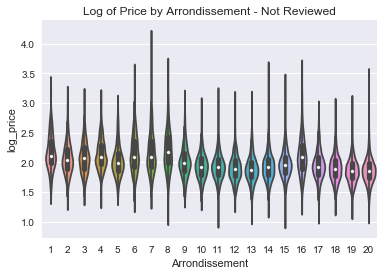

In [18]:
sns.violinplot(paris_rev.arrondissement, paris_rev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Reviewed')
plt.show()

sns.violinplot(paris_notrev.arrondissement, paris_notrev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Not Reviewed')
plt.show()

In [38]:
# linear regression - reviewed vs not reviewed 

paris.columns
X = paris_rev[['room_type', 'accommodates', 'arrondissement', 'bedrooms']]

In [39]:
X = pd.get_dummies(X, columns = ['arrondissement', 'room_type'])


In [40]:
X = X.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [41]:
X_nr = paris_notrev[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_nr= pd.get_dummies(X_nr, columns = ['room_type', 'arrondissement'])


In [42]:
X_nr = X_nr.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [43]:
# regression  - rentals that have been reviewed 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# add constant 
X = sm.add_constant(X)

y_rev = paris_rev.log_price

lm_rev = sm.OLS(y_rev, X).fit()

print(lm_rev.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     3079.
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:48:35   Log-Likelihood:                 21733.
No. Observations:               51055   AIC:                        -4.342e+04
Df Residuals:                   51031   BIC:                        -4.320e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [44]:
# regression - rentals that have not been reviewed 

X_nr = sm.add_constant(X_nr)

y_nr = paris_notrev.log_price

lm_nr = sm.OLS(y_nr, X_nr).fit()

print(lm_nr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     811.6
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:48:52   Log-Likelihood:                 4508.3
No. Observations:               19103   AIC:                            -8969.
Df Residuals:                   19079   BIC:                            -8780.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

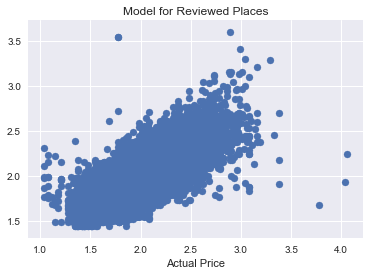

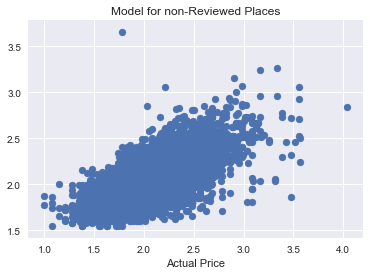

In [45]:
plt.scatter(paris_rev.log_price, lm_rev.predict(X))
plt.xlabel('Actual Price')
# plt.ylabel('Model Predicted Price')
plt.title('Model for Reviewed Places')
plt.show()

plt.scatter(paris_notrev.log_price, lm_nr.predict(X_nr))
plt.xlabel('Actual Price')
# plt.ylabel('Model Predicted Price')
plt.title('Model for non-Reviewed Places')
plt.show()

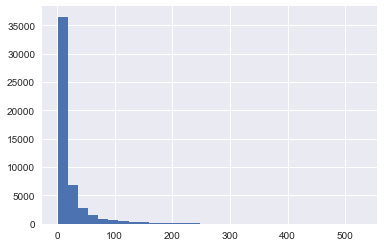

In [40]:
# Split by high reviews, low reviews

plt.hist(paris_rev.reviews, bins=30)
plt.show()

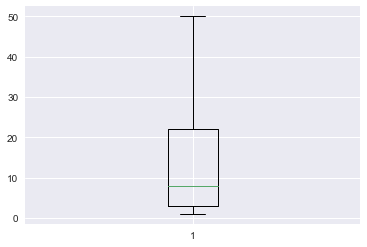

In [41]:
plt.boxplot(paris_rev.reviews.values, showfliers=False)
plt.show()

In [47]:
np.percentile(paris_rev.reviews, 25)

3.0

In [48]:
np.percentile(paris_rev.reviews, 75)

22.0

In [49]:
np.percentile(paris_rev.reviews, 95)

83.0

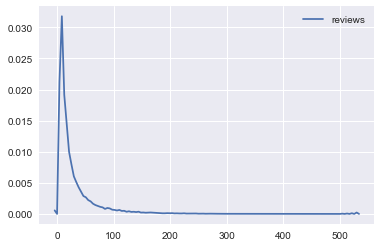

In [50]:
sns.kdeplot(paris_rev.reviews)
plt.show()

In [51]:
paris_regular = paris_rev[paris_rev['reviews'] <= 22]
paris_highish = paris_rev[paris_rev['reviews'] > 22]

In [52]:
paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]

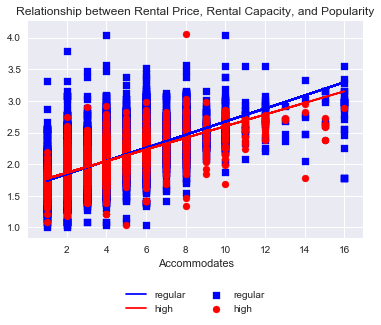

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_low.accommodates, paris_low.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_low.accommodates, paris_low.log_price, 1)
ax1.plot(paris_low.accommodates, m*paris_low.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, l*paris_reg.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Relationship between Rental Price, Rental Capacity, and Popularity')
plt.xlabel('Accommodates')
#plt.ylabel('Log of Price')
plt.show()

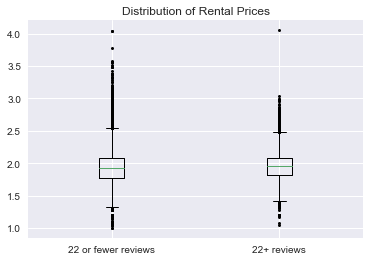

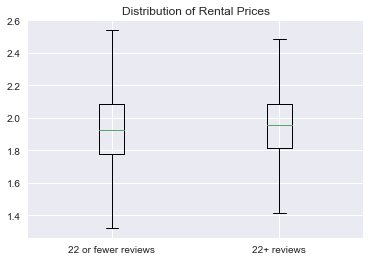

In [54]:
paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]

plt.boxplot([paris_low.log_price, paris_reg.log_price], sym='k.')
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_low.log_price, paris_reg.log_price], showfliers=False)
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

In [55]:
X_regular = paris_regular[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_regular = pd.get_dummies(X_regular, columns = ['room_type', 'arrondissement'])

X_regular = X_regular.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)


In [56]:
X_highish = paris_highish[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_highish = pd.get_dummies(X_highish, columns = ['room_type', 'arrondissement'])

X_highish = X_highish.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [57]:
# regression for reviewed houses below 75th percentile
X_regular = sm.add_constant(X_regular)

y_regular = paris_regular.log_price

lm_regular = sm.OLS(y_regular, X_regular).fit()

print(lm_regular.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     2283.
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:50:14   Log-Likelihood:                 15846.
No. Observations:               38737   AIC:                        -3.164e+04
Df Residuals:                   38713   BIC:                        -3.144e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [58]:
# regression for things above 75th percentile 

X_highish = sm.add_constant(X_highish)

y_highish = paris_highish.log_price

lm_highish = sm.OLS(y_highish, X_highish).fit()

print(lm_highish.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     815.3
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:50:37   Log-Likelihood:                 6056.2
No. Observations:               12318   AIC:                        -1.206e+04
Df Residuals:                   12294   BIC:                        -1.189e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [59]:
# split data into high and low number of reviews based on 95th percentile 

paris_reg = paris[paris['reviews'] <= 82]
paris_high = paris[paris['reviews'] > 82]

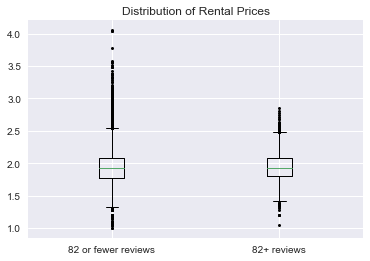

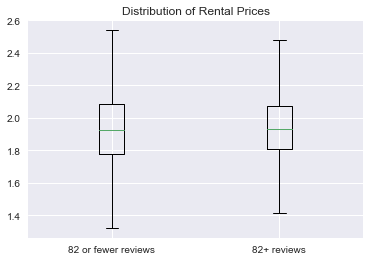

In [60]:
# examine data 

plt.boxplot([paris_reg.log_price, paris_high.log_price], sym='k.')
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_reg.log_price, paris_high.log_price], showfliers=False)
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

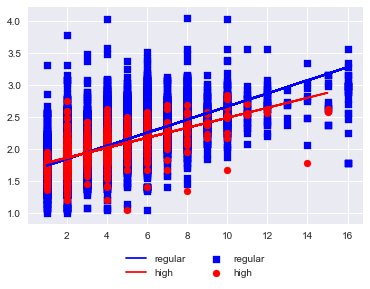

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, m*paris_reg.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_high.accommodates, paris_high.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_high.accommodates, paris_high.log_price, 1)
ax1.plot(paris_high.accommodates, l*paris_high.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [62]:
# linear regression - rentals with high number of reviews versus typical number of reviews 

X_reg = paris_reg[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_reg = pd.get_dummies(X_reg, columns = ['room_type', 'arrondissement'])

X_reg = X_reg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [63]:
X_high = paris_high[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_high = pd.get_dummies(X_high, columns = ['room_type', 'arrondissement'])

X_high = X_high.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [64]:
# regression: rentals with typical number of reviews 

X_reg = sm.add_constant(X_reg)

y_reg = paris_reg.log_price

lm_reg = sm.OLS(y_reg, X_reg).fit()

print(lm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3616.
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:31   Log-Likelihood:                 24150.
No. Observations:               67579   AIC:                        -4.825e+04
Df Residuals:                   67555   BIC:                        -4.803e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [65]:
# regression - rentals with high number of reviews 

X_high = sm.add_constant(X_high)

y_high = paris_high.log_price

lm_high = sm.OLS(y_high, X_high).fit()

print(lm_high.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:53   Log-Likelihood:                 1284.6
No. Observations:                2579   AIC:                            -2521.
Df Residuals:                    2555   BIC:                            -2381.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [63]:
# Naive Bayes
# Interested in the probability of rental given rental features 

paris.head()

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified,arrondissement,log_price
0,0,10047973,48528719,Shared room,Gare,1,0.0,4,1.0,108.0,2017-07-30 15:04:34.451584,13,2.033424
1,1,2864617,4531179,Shared room,Villette,32,4.0,5,1.0,59.0,2017-07-30 15:04:27.937000,19,1.770852
2,2,5862381,30438981,Shared room,Saint-Georges,0,0.0,2,1.0,121.0,2017-07-30 15:04:14.500773,9,2.082785
3,3,17197886,115781027,Shared room,Necker,0,0.0,3,1.0,93.0,2017-07-30 15:04:10.159664,15,1.968483
4,4,16103729,77134343,Shared room,Villette,4,4.5,4,1.0,100.0,2017-07-30 15:04:08.086163,19,2.000000


In [46]:
paris.describe()

,Unnamed: 0,Unnamed: 0.1,accommodates,bedrooms,host_id,minstay,overall_satisfaction,price,reviews,room_id,log_price,month,arrondissement
count,620875.000000,620875.000000,620875.000000,620875.000000,6.208750e+05,620875.000000,620875.000000,620875.000000,620875.000000,6.208750e+05,620875.000000,620875.000000,620875.000000
mean,310437.000000,31411.748429,3.078145,1.065128,2.787181e+07,1.354869,2.696545,109.039984,14.047401,8.736191e+06,1.949419,3.931474,11.996709
std,179231.318528,18354.051515,1.487094,0.806276,2.864155e+07,2.103294,2.294549,118.205766,28.282831,5.414301e+06,0.251831,2.340141,5.538192
min,0.000000,0.000000,1.000000,0.000000,1.415000e+03,1.000000,0.000000,8.000000,0.000000,2.525000e+03,0.903090,1.000000,1.000000
25%,155218.500000,15349.000000,2.000000,1.000000,6.741410e+06,1.000000,0.000000,60.000000,0.000000,4.035564e+06,1.778151,2.000000,8.000000
50%,310437.000000,31470.000000,2.000000,1.000000,1.742267e+07,1.000000,4.500000,84.000000,4.000000,8.139247e+06,1.924279,4.000000,12.000000
75%,465655.500000,46953.000000,4.000000,1.000000,3.866390e+07,1.000000,4.500000,121.000000,14.000000,1.341992e+07,2.082785,6.000000,17.000000
max,620874.000000,70157.000000,16.000000,10.000000,1.432046e+08,695.000000,5.000000,11323.000000,529.000000,2.014408e+07,4.053962,8.000000,20.000000


In [67]:
# create categorical variables for all continuous to use bernoulli naive bayes 

paris_categorical = pd.read_csv('paris_onemonth.csv')

# pctile_25 = np.percentile(paris_categorical.accommodates, 25)
# pctile_75 = np.percentile(paris_categorical.accommodates, 75)

# paris_categorical['accom_cat'] = np.nan
# paris_categorical.loc[paris_categorical['accommodates'] < pctile_25, 'accom_cat'] = 'low'
# paris_categorical.loc[(paris_categorical['accommodates'] > pctile_25) & paris_categorical['accommodates'] <pctile_75, 'accom_cat'] = 'typical'
# paris_categorical.loc[paris_categorical['accommodates'] > pctile_75, 'accom_cat'] = 'high'



In [48]:
# turn continuous data into categorical data for naive bayes

# pctile_25 = np.percentile(paris_categorical.bedrooms, 25)
# pctile_75 = np.percentile(paris_categorical.bedrooms, 75)

# paris_categorical['bedroom_cat'] = np.nan
# paris_categorical.loc[paris_categorical['bedrooms'] < pctile_25, 'bedroom_cat'] = 'low'
# # paris_categorical.loc[(paris_categorical['bedrooms'] > pctile_25) & paris_categorical['bedrooms'] <pctile_75, 'bedroom_cat'] = 'typical'
# paris_categorical.loc[paris_categorical['accommodates'] > pctile_75, 'accom_cat'] = 'high'

# paris_categorical['accommodates'] = pd.cut(paris.accommodates, bins=3, labels = ['low', 'medium', 'high'])

# paris_categorical['bedrooms'] = pd.cut(paris.bedrooms, bins=3, labels = ['low', 'medium', 'high'])

# paris_categorical['log_price'] = pd.cut(paris.log_price, bins=4, labels = ['low', 'medium', 'high', 'very high'])

In [49]:
# # convert to dummy variables 
# paris_categorical = pd.get_dummies(paris_categorical, columns = ['accommodates', 'bedrooms', 'room_type', 'month', 'arrondissement', 
#                                                 'log_price'])

In [68]:
# add a binary variable for booked or not booked (0 reviews or more than 0 reviews)

paris_categorical['booked'] = np.nan
paris_categorical.loc[paris_categorical['reviews'] >= 1, 'booked'] = int(1)
paris_categorical.loc[paris_categorical['reviews'] == 0, 'booked'] = int(0)
paris_categorical.head() 

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified,arrondissement,log_price,booked
0,0,10047973,48528719,Shared room,Gare,1,0.0,4,1.0,108.0,2017-07-30 15:04:34.451584,13,2.033424,1.0
1,1,2864617,4531179,Shared room,Villette,32,4.0,5,1.0,59.0,2017-07-30 15:04:27.937000,19,1.770852,1.0
2,2,5862381,30438981,Shared room,Saint-Georges,0,0.0,2,1.0,121.0,2017-07-30 15:04:14.500773,9,2.082785,0.0
3,3,17197886,115781027,Shared room,Necker,0,0.0,3,1.0,93.0,2017-07-30 15:04:10.159664,15,1.968483,0.0
4,4,16103729,77134343,Shared room,Villette,4,4.5,4,1.0,100.0,2017-07-30 15:04:08.086163,19,2.000000,1.0


In [99]:
# create X for naive bayes model

X_nb = paris_categorical[['accommodates', 'bedrooms', 'log_price']]

In [100]:
# create y for naive bayes model

y = paris_categorical['booked']

In [101]:
# bernoulli naive bayes model

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.724629418472
[[   89  3726]
 [  138 10079]]


In [102]:
# check for class imbalance
print(len(paris_categorical[paris_categorical['booked'] == 1])/len(paris_categorical.booked))
print(len(paris_categorical[paris_categorical['booked'] == 0])/len(paris_categorical.booked))

# resample the data for balance
from sklearn.utils import resample
paris_maj = paris_categorical[paris_categorical['booked'] == 1]
paris_min = paris_categorical[paris_categorical['booked'] == 0]


paris_min_up = resample(paris_min, 
                        replace=True,     # sample with replacement
                        n_samples=51055,    # to match majority class
                        random_state=123) # reproducible results


paris_balanced = pd.concat([paris_maj, paris_min_up])

# get data for x and y
X_bal = paris_balanced[['accommodates', 'bedrooms', 'log_price']]

y_bal = paris_balanced['booked']


# re run naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

0.7277145870748881
0.2722854129251119


In [105]:
# get accuracy and confusion matrix. 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

print(sum(y_test))

0.525903437469
[[3029 7210]
 [2472 7711]]
10183.0


Lost accuracy, gained precision, but not doing a great job of predicting.

In [92]:
# break up review data into multiple classes 

pctile_5 = np.percentile(paris_rev.reviews, 5)
pctile_25 = np.percentile(paris_rev.reviews, 25)
pctile_75 = np.percentile(paris_rev.reviews, 75)
pctile_95 = np.percentile(paris_rev.reviews, 95)



In [93]:
paris_categorical['booking_amounts'] = np.nan
paris_categorical.loc[paris_categorical['reviews'] ==0, 'booking_amounts'] = 'none'
paris_categorical.loc[(paris_categorical['reviews'] >= pctile_5) & (paris_categorical['reviews'] <= pctile_25), 'booking_amounts'] = 'low'
paris_categorical.loc[(paris_categorical['reviews'] > pctile_25) & (paris_categorical['reviews'] <= 75), 'booking_amounts'] = 'typical'
paris_categorical.loc[(paris_categorical['reviews'] > pctile_75) & (paris_categorical['reviews'] <= 95), 'booking_amounts'] = 'high'
paris_categorical.loc[paris_categorical['reviews'] > pctile_95, 'booking_amounts'] = 'very high'
paris_categorical.head() 

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified,arrondissement,log_price,booked,booking_amounts
0,0,10047973,48528719,Shared room,Gare,1,0.0,4,1.0,108.0,2017-07-30 15:04:34.451584,13,2.033424,1.0,low
1,1,2864617,4531179,Shared room,Villette,32,4.0,5,1.0,59.0,2017-07-30 15:04:27.937000,19,1.770852,1.0,high
2,2,5862381,30438981,Shared room,Saint-Georges,0,0.0,2,1.0,121.0,2017-07-30 15:04:14.500773,9,2.082785,0.0,none
3,3,17197886,115781027,Shared room,Necker,0,0.0,3,1.0,93.0,2017-07-30 15:04:10.159664,15,1.968483,0.0,none
4,4,16103729,77134343,Shared room,Villette,4,4.5,4,1.0,100.0,2017-07-30 15:04:08.086163,19,2.000000,1.0,typical


In [94]:
# split up x and y again, make y the categorical variable defined above 

X_nb = paris_categorical[['accommodates', 'bedrooms', 'log_price']]

y = paris_categorical['booking_amounts']


In [95]:
# create naive bayes classifier
x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('none', len(paris_categorical[paris_categorical['booking_amounts']=='none'])/len(paris_categorical['booking_amounts']))
print('low', len(paris_categorical[paris_categorical['booking_amounts']=='low']) / len(paris_categorical['booking_amounts']))
print('high', len(paris_categorical[paris_categorical['booking_amounts']=='high']) /len(paris_categorical['booking_amounts']))
print('typical', len(paris_categorical[paris_categorical['booking_amounts']=='typical']) /len(paris_categorical['booking_amounts']))
print('very high', len(paris_categorical[paris_categorical['booking_amounts']=='very high']) /len(paris_categorical['booking_amounts']))

0.337799315849
none 0.2722854129251119
low 0.2172667407850851
high 0.13942814789475186
typical 0.33487271586989364
very high 0.0361469825251575
